<a href="https://colab.research.google.com/github/yoonputer/Team_Project2/blob/master/Deeplearning/test_dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 설치

konlpy


In [ ]:
! ls ./drive/MyDrive/Forkspoon/dummy1.xlsx

In [ ]:
!python -m pip install konlpy

In [55]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  52750      0 --:--:-- --:--:-- --:--:-- 52750


In [ ]:
!source ./mecab.sh

## 데이터 가져오기

In [ ]:
!ls ./drive/MyDrive/Forkspoon/db.sqlite3

In [58]:
import sqlite3
import pandas as pd
connect = sqlite3.connect('./drive/MyDrive/Forkspoon/db.sqlite3')

In [59]:
choice = pd.read_sql_query('select * from write_choice',connect)

In [60]:
type(choice)
choice_cols = choice[['점수','질문','답변']]
choice_cols

,점수,질문,답변
0,2.0,입사 지원동기를 작성해주세요. (① 지원 부문을 선택한 이유와 ② 지원 부문과 관련...,"\n경영은 전사의 콘텐츠 제작에서부터 유통 과정을 파악하고, 설정한 목표를 이루기 ..."
1,3.0,"우리 공단에 지원동기와 직무를 선택한 이유, 입사 후 목표와 포부를 기술해 주십시오...","\n""‘재료’를 전공하며 나의 가치를 증명하다""\n 제조업은 우리나라 경제의 주요 ..."
2,2.0,"지원직무를 선택한 이유를(직무와 관련한 경험, 전공, 수강과목, 자격증 등을 포함하...","\n""직접 만든다는 것""\n 실습을 위해 콤부차를 조사하였습니다. 한정된 자료에서 ..."
3,2.0,본인이 선택한 직무에 대해 아래 내용을 포함하여 기술하시오. ①지원한 직무의 역할이...,\n`전지적 참견 시점`\n 영업관리 직무는 BGF리테일의 점포 관리를 위한 매니저...
4,4.0,"본인이 선택한 직무를 담당하고 싶은 이유, 적합성 등에 대해 자유롭게 설명해 보십시...",\n16살에 처음 회계를 접하고 흥미를 느껴 뚜렷한 진로 방향을 형성했습니다.\n기...
...,...,...,...
2992,2.0,화천그룹 및 해당분야 지원동기최소 (30~400),"\n공작기계분야에 있어서 두산인프라코어, 현대위아와 어깨를 나란히 하는 화천기계는 ..."
2993,4.0,지원동기 및 입사 후 포부,"\n(`마트`라는 채널에서 보고 느낀 영업사원들의 모습)\n마트에서 일하면서 판매,..."
2994,4.0,직무 지원동기,"\n<사람을 좋아하는 마음, 경험과 지식을 통해 또 다른 가치를 만들다> \n새로운..."
2995,5.0,LG디스플레이 및 지원 직무에 지원하는 동기에 대해 기술해 주십시오. 성격(장단점)...,\n‘2015 나노 코리아’에서 LG OLED UHD TV를 보고 말을 잃었습니다....


## NLP 

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_data = choice_cols['답변']
y_data = choice_cols['점수']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((2247,), (2247,), (750,), (750,))

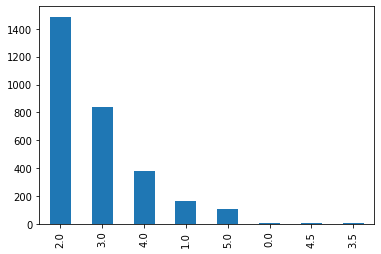

In [64]:
y_data.value_counts().plot(kind='bar')

In [65]:
type(x_train)

pandas.core.series.Series

In [66]:
x_temp = x_train
x_temp= x_temp.str.replace('[^가-힣ㄱ-ㅎ0-9ㅏ-ㅣ]','')
x_temp

2877    롯데는수많은계열사가있고국민들이즐겨찾기에그만큼일거리도많을것입니다롯데정보통신은이러한요구...
2774    이로움을전해주는명품조연누구보다반짝이는조연이되고싶어은행원에대한꿈을키워왔습니다과거에는어...
1435    도전과성장의일치경영학을복수전공하면서기업에서수익을가장잘낼수있고모든산업의근간이되는것은물...
1294    문명이발전하게된원동력은통신수단의발달이라고생각했습니다그로인해많은사상과문명이생겨났고이에...
2000    고등학교때보안에무지하여계정을몇번해킹당한후정보보안직무에관심을갖게되었습니다대학교입학을학...
                              ...                        
2334    전자재료공정연구실학부연구생저는반도체와연관된전공수업을수강하여반도체에대한이해를높이기위해...
1067    열정은창의를창의는개선을이끈다저는조직에서맡은업무를개선하는퍼스트무버가되기위해노력했습니다...
151     의신유통사업은국내를넘어해외로다양한제품과브랜드를수출하면서한국문화의세계화를주도하고있습니...
376     안정적인전력공급의필요성고등학교재학중프로젝트연수를위해2주간에서생활한경험이있습니다에도착...
2876    세계와솔브레인의연결고리솔브레인은국내반도체및디스플레이제조에만족하지않고지속적인해외시장확...
Name: 답변, Length: 2247, dtype: object

### stopwords

```
import pandas as pd

lst_A = ['a','b','c','d', 'e', 1, 2]
df = pd.DataFrame(lst_A)

df.columns=['']

import numpy as np

np.array(df[0].tolist())
```

In [67]:
stopwords = pd.read_sql_query('select * from stopwords',connect)

stopwords.describe()

type(stopwords)

pandas.core.frame.DataFrame

In [68]:
import numpy as np

ko_stopwords_list = np.array(stopwords['words'].tolist())
ko_stopwords_list

array(['이', '있', '하', ..., '잘', '통하', '놓'], dtype='<U4')

### Mecab

In [69]:
from konlpy.tag import Mecab
mecab= Mecab()

In [ ]:
# mecab.pos(x_temp[0])
mecab.morphs(x_temp[0])

In [71]:
def non_stopwords(x_temp):
  sentance = list ()
  
  for tok in x_temp:
    encoded = mecab.morphs(tok)

    sentance.append([item for item in encoded if item not in ko_stopwords_list])

  return sentance

In [ ]:
non_stopwords(x_temp[0])

```
 [],
 ['준'],
 ['비'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['쉬'],
 ['운'],
 [],
 ['3'],
 ['글'],
 [],
 [],
 ['6'],
 ['4'],
 ['9'],
 [],
 ['1'],
 ['1'],
 ['2'],
 ['2']]
 ```

## Tokenizer

In [73]:
import tensorflow as tf

In [74]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [75]:
tokenizer.fit_on_texts(non_stopwords(x_temp))

In [ ]:
tokenizer.word_index

```
'주력': 989,
 '턴': 990,
 '서적': 991,
 '무대': 992,
 '한화': 993,
 '일조': 994,
 '오프라인': 995,
 '금속': 996,
 '마련': 997,
 '높여': 998,
 '검사': 999,
 '교통': 1000,
 ...}
 ```

In [ ]:
tokenizer.word_counts

```
 ('부지런히', 15),
             ('움직이', 48),
             ('어렵', 62),
             ('성취', 63),
             ('신경', 19),
             ('써야', 10),
             ('실적', 77),
             ('거래처', 85),
             ('협력', 237),
             ('토대', 146),
             ('1181', 7),
             ('2009', 3),
             ('제어', 115),
             ...])         
```

In [78]:
total_cnt = len(tokenizer.word_index)

In [79]:
rare_cnt = 0
total_freq,rare_freq = 0,0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value #전체 단어의 수
  if(value <=2):
    rare_cnt = rare_cnt+ 1  
    rare_freq = rare_freq + value #2미만인 단어(희귀단어)의 수

In [80]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

(16290, 8571, 52.61510128913444, 3.5907372308572576)

In [81]:
vocab_size = total_cnt - rare_cnt #보케블러리 사이즈
vocab_size 

7719

In [82]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')

In [83]:
tokenizer.fit_on_texts(non_stopwords(x_temp))

In [ ]:
tokenizer.index_word

```
 989: '인생',
 990: '주력',
 991: '턴',
 992: '서적',
 993: '무대',
 994: '한화',
 995: '일조',
 996: '오프라인',
 997: '금속',
 998: '마련',
 999: '높여',
 1000: '검사',
 ...}
```

In [108]:
tokenizer.index_word[996]

'오프라인'

In [109]:
import pickle
# pickle.dump(tokenizer.index_word, open('./drive/MyDrive/Forkspoon/tok_index_word.pkl','wb'))

## To int 


In [85]:
x_train = tokenizer.texts_to_sequences(non_stopwords(x_temp))

In [86]:
len(x_train[0]),len(x_train[40]),len(x_train[50])

(84, 162, 183)

In [87]:
hist_len = [len(words) for words in x_train]

In [88]:
import matplotlib.pyplot as plt

(array([  8.,   1.,  25.,  56.,  81., 146., 203., 320., 267., 225., 183.,
        165.,  82., 123., 123.,  90.,  64.,  15.,  11.,   6.,  12.,  10.,
          2.,   4.,   4.,   5.,   3.,   1.,   2.,   5.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  5.  ,  18.34,  31.68,  45.02,  58.36,  71.7 ,  85.04,  98.38,
        111.72, 125.06, 138.4 , 151.74, 165.08, 178.42, 191.76, 205.1 ,
        218.44, 231.78, 245.12, 258.46, 271.8 , 285.14, 298.48, 311.82,
        325.16, 338.5 , 351.84, 365.18, 378.52, 391.86, 405.2 , 418.54,
        431.88, 445.22, 458.56, 471.9 , 485.24, 498.58, 511.92, 525.26,
        538.6 , 551.94, 565.28, 578.62, 591.96, 605.3 , 618.64, 631.98,
        645.32, 658.66, 672.  ]),
 <a list of 50 Patch objects>)

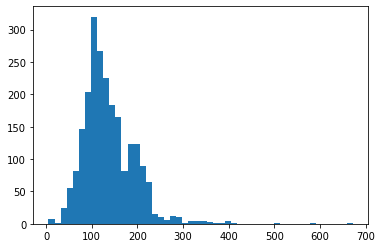

In [89]:
plt.hist(hist_len, bins=50)

- Pad 몇정도 하면 좋을지 여기서 확인

In [90]:
sum(hist_len)/ len(x_train)

136.89230084557187

In [91]:
x_train =tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=300)

In [92]:
x_train

array([[   0,    0,    0, ...,    8, 2460, 4644],
       [   0,    0,    0, ...,    8,    1, 6311],
       [   0,    0,    0, ...,    8, 2588, 5343],
       ...,
       [   0,    0,    0, ...,    8, 2767, 7527],
       [   0,    0,    0, ...,    8,    1,    1],
       [   0,    0,    0, ...,    8, 5314,    1]], dtype=int32)

In [93]:
len(y_train)

2247

In [94]:
np.unique(y_train)

array([0. , 1. , 2. , 3. , 3.5, 4. , 4.5, 5. ])

In [95]:
type(y_train)

pandas.core.series.Series

In [96]:
len(x_train), len(y_train)

(2247, 2247)

## Model

In [97]:
model = tf.keras.models.Sequential()

In [98]:
model.add(tf.keras.layers.Embedding(input_dim= vocab_size, output_dim =30 ,input_length=300))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
# model.add(tf.keras.layers.GRU(128))
model.add(tf.keras.layers.Dense(8,activation='softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.3, shuffle=True)

```
7/7 [==============================] - 19s 3s/step - loss: 0.0169 - acc: 0.9917 - val_loss: 3.2740 - val_acc: 0.4222
Epoch 95/100
7/7 [==============================] - 18s 3s/step - loss: 0.0113 - acc: 0.9936 - val_loss: 3.3063 - val_acc: 0.4222
Epoch 96/100
7/7 [==============================] - 18s 3s/step - loss: 0.0122 - acc: 0.9930 - val_loss: 3.2781 - val_acc: 0.4267
Epoch 97/100
7/7 [==============================] - 17s 2s/step - loss: 0.0090 - acc: 0.9949 - val_loss: 3.3197 - val_acc: 0.4252
Epoch 98/100
7/7 [==============================] - 17s 2s/step - loss: 0.0084 - acc: 0.9955 - val_loss: 3.4404 - val_acc: 0.4193
Epoch 99/100
7/7 [==============================] - 17s 2s/step - loss: 0.0080 - acc: 0.9949 - val_loss: 3.5164 - val_acc: 0.4178
Epoch 100/100
7/7 [==============================] - 17s 2s/step - loss: 0.0075 - acc: 0.9955 - val_loss: 3.6041 - val_acc: 0.4148
```

## Evaluation


In [100]:
model.evaluate(x_train, y_train) # loss: 0.0075 - acc: 0.9955 - val_loss: 3.6041 - val_acc: 0.4148 LSTM

71/71 [==============================] - 7s 104ms/step - loss: 1.0875 - acc: 0.8211


[1.0875244140625, 0.821094810962677]

In [101]:
# model.evaluate(x_train, y_train) #loss: 0.2919 - acc: 0.8957 - val_loss: 3.0092 - val_acc: 0.4222

## Service

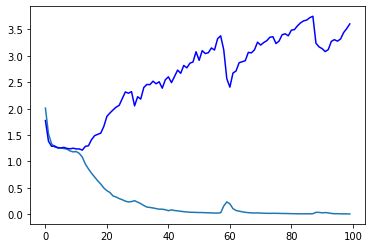

In [102]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'b-')

plt.show()

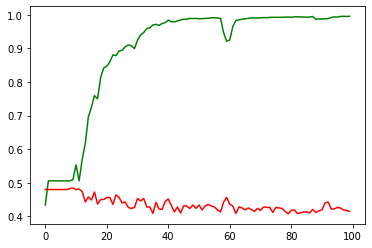

In [103]:
plt.plot(hist.history['acc'],'g-')
plt.plot(hist.history['val_acc'],'r-')
plt.show()

In [111]:
y_train

2877    4.5
2774    4.0
1435    2.0
1294    3.0
2000    3.0
       ... 
2334    3.0
1067    2.0
151     2.0
376     4.0
2876    4.0
Name: 점수, Length: 2247, dtype: float64

In [112]:
x_train

array([[   0,    0,    0, ...,    8, 2460, 4644],
       [   0,    0,    0, ...,    8,    1, 6311],
       [   0,    0,    0, ...,    8, 2588, 5343],
       ...,
       [   0,    0,    0, ...,    8, 2767, 7527],
       [   0,    0,    0, ...,    8,    1,    1],
       [   0,    0,    0, ...,    8, 5314,    1]], dtype=int32)

In [113]:
#  model.save('./drive/MyDrive/Forkspoon/test_dummy_LSTM.h5')